In [3]:
filename = 'heatmap_1.txt'
start_pos = (0, 0)
fn = filename.split(".")[0]
prob_dict = {}
non_zero_nodes = {}

file = open(filename,'r') 

def euclid_distance(a, b):
    return(((a[0] - b[0])**2 + (a[1] - b[1])**2)**(1/2))
    


for l in file:
    contents = l.split(" ")
    x = int(contents[0])
    y = int(contents[1])
    point = (x, y)
    prob = float(contents[2])
    prob_dict[point] = prob
    
    if(prob > 0):
        if(x in non_zero_nodes.keys()):
            x_ys = non_zero_nodes[x]
            x_ys.append(y)
            x_ys.sort()
            non_zero_nodes[x] = x_ys
        else:
            non_zero_nodes[x] = [y]
        
        
non_zero_cols = list(non_zero_nodes.keys())
non_zero_cols.sort()

In [4]:
prev_pos = start_pos
direction_up = True
total_distance = 0.0
total_probability = prob_dict[prev_pos]
dist_snaps = []
prob_snaps = []
covered_nodes = [prev_pos]

# with open(,'wb') as file:
f = open('results/' + fn + '_lawnmower_path.csv','w')
f.write("x,y")
f.write("\n")
f.write("0,0")
f.write("\n")

for x in non_zero_cols:
    ys = non_zero_nodes[x]
    if not direction_up:
        ys.reverse()
    for y in ys:
        new_pos = (x, y)
        total_distance += euclid_distance(prev_pos, new_pos)
        total_probability += prob_dict[new_pos]
        dist_snaps.append(total_distance)
        prob_snaps.append(total_probability)
        prev_pos = new_pos
        covered_nodes.append(new_pos)
        st = str(x) + "," + str(y)
        f.write(st)
        f.write("\n")


    direction_up = not direction_up

f.close()

In [5]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(dist_snaps, prob_snaps, "-")
plt.title('Time vs Cumulative Probability')
plt.xlabel('Time')
plt.ylabel('Cumulative Probability')
# plt.show()
plt.savefig('results/' + fn + "_lawnmower_timeVprob.png", dpi = 200)

In [7]:
#closest non-zero prob nodes:

d = 0

for x in non_zero_nodes.keys():
    for y in non_zero_nodes[x]:
        if d == 0:
            d = euclid_distance((x, y), start_pos)  
        else:
            if euclid_distance((x, y), start_pos)  < d:
#                 print(x,y)
                d = euclid_distance((x, y), start_pos)
                
# d

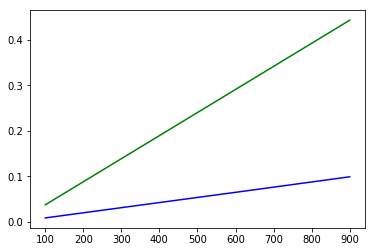

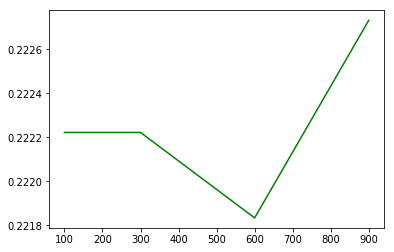

In [10]:
#Efficiency LB calculcation
import numpy as np
import pandas as pd

all_probs = list(prob_dict.values())
all_probs.sort()
all_probs.reverse()

dist_snaps_np = np.array(dist_snaps)
prob_snaps_np = np.array(prob_snaps)

ts = [100, 200, 300, 600, 900]
# ts = range(100, 5000, 50)
B = []
PC = []
efficiencyLB = []

for t in ts:
    N = int(t + 1 - d)
    Bt = sum(all_probs[:N])
    
    a = dist_snaps_np - t
    Pt = prob_snaps_np[abs(a) == min(abs(a))]
    Pt = Pt[0]
    Pt = float(Pt)

    B.append(Bt)
    PC.append(Pt)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(ts, B, 'g-')
ax2.plot(ts, PC, 'b-')
plt.savefig('results/' + fn + "_lawnmower_BPt_coverageVtime.png", dpi = 200)


B = np.array(B)
PC = np.array(PC)
efficiencyLB = PC/B

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.plot(ts, efficiencyLB, 'g-')
plt.savefig('results/' + fn + "_lawnmower_efficiencyLB.png", dpi = 200)

efficiency = pd.DataFrame({'T':ts, 'B': B, 'PC': PC, 'efficiencyLB': efficiencyLB})
efficiency.to_csv('results/' + fn + '_lawnmower_efficiency_LB.csv')

In [11]:
total_distance

5203.032677414069